In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

 99% 261M/262M [00:01<00:00, 183MB/s]
100% 262M/262M [00:01<00:00, 167MB/s]


In [6]:
!unzip "/content/craigslist-carstrucks-data.zip" -d "/content"

Archive:  /content/craigslist-carstrucks-data.zip
  inflating: /content/vehicles.csv   


In [196]:
import pandas as pd

In [197]:
pd.set_option('display.max_rows', 500)

In [198]:
df=pd.read_csv("/content/vehicles.csv")

In [199]:
df.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [200]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [202]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [203]:
#null verilerin bütüne oranı
df.isnull().sum() / df.shape[0]

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
image_url       0.000159
description     0.000164
county          1.000000
state           0.000000
lat             0.015342
long            0.015342
posting_date    0.000159
dtype: float64

In [204]:
#Her sütundaki farklı değerlerin listesi
for col in df:
    print("\n",col, '=' ,df[col].unique())
    print("\n","--------END OF COLUMN-----------------")


 id = [7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129]

 --------END OF COLUMN-----------------

 url = ['https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html'
 'https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html'
 'https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html'
 ...
 'https://wyoming.craigslist.org/ctd/d/atlanta-2020-caddy-cadillac-xt4-sport/7301591147.html'
 'https://wyoming.craigslist.org/ctd/d/atlanta-2018-lexus-es-es-350-sedan-4d/7301591140.html'
 'https://wyoming.craigslist.org/ctd/d/atlanta-2019-bmw-series-430i-gran-coupe/7301591129.html']

 --------END OF COLUMN-----------------

 region = ['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville /

In [205]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [206]:
#Her sütundaki farklı değerlerin miktari
for col in df:
    print(df[col].nunique(),'different value in the',col,'column')

426880 different value in the id column
426880 different value in the url column
404 different value in the region column
413 different value in the region_url column
15655 different value in the price column
114 different value in the year column
42 different value in the manufacturer column
29667 different value in the model column
6 different value in the condition column
8 different value in the cylinders column
5 different value in the fuel column
104870 different value in the odometer column
6 different value in the title_status column
3 different value in the transmission column
118264 different value in the VIN column
3 different value in the drive column
4 different value in the size column
13 different value in the type column
12 different value in the paint_color column
241899 different value in the image_url column
360911 different value in the description column
0 different value in the county column
51 different value in the state column
53181 different value in the lat c

In [207]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [208]:
df = df.drop(['url','region_url','size','image_url','description','county'],axis=1)
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,lat,long,posting_date
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [209]:
df= df.drop('VIN',axis=1)
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [210]:
df.shape

(426880, 19)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
 16  lat           420331 non-null  float64
 17  long          420331 non-null  float64
 18  post

In [212]:
# Arabaların yaşını gösteren yeni sütun eklenmesi
df['age'] = 2021 - df['year']
df.tail(20)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,age
426860,7301951544,wyoming,39990,2017.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,41664.0,clean,automatic,4wd,other,black,wy,33.779214,-84.411811,2021-04-05T03:20:23-0600,4.0
426861,7301951550,wyoming,30990,2019.0,alfa-romeo,romeo giulia ti sedan 4d,good,NaN,other,3883.0,clean,other,NaN,sedan,blue,wy,33.786500,-84.445400,2021-04-05T03:20:24-0600,2.0
426862,7301950980,wyoming,27590,2018.0,NaN,Genesis G80 3.8 Sedan 4D,good,6 cylinders,gas,36138.0,clean,other,NaN,sedan,black,wy,33.786500,-84.445400,2021-04-05T03:10:18-0600,3.0
426863,7301949724,wyoming,25590,2017.0,NaN,Genesis G80 3.8 Sedan 4D,good,6 cylinders,gas,37608.0,clean,automatic,rwd,sedan,white,wy,33.786500,-84.445400,2021-04-05T02:50:20-0600,4.0
426864,7301949196,wyoming,29590,2016.0,toyota,4runner sr5 sport utility,good,6 cylinders,gas,53475.0,clean,automatic,NaN,SUV,black,wy,33.786500,-84.445400,2021-04-05T02:41:28-0600,5.0
426865,7301949193,wyoming,34590,2020.0,alfa-romeo,romeo giulia sedan 4d,good,NaN,other,2498.0,clean,other,rwd,sedan,black,wy,33.779214,-84.411811,2021-04-05T02:41:27-0600,1.0
426866,7301949190,wyoming,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,automatic,rwd,other,black,wy,33.779214,-84.411811,2021-04-05T02:41:26-0600,5.0
426867,7301949178,wyoming,28990,2018.0,jaguar,xe 25t prestige sedan 4d,good,NaN,other,16841.0,clean,other,rwd,sedan,white,wy,33.786500,-84.445400,2021-04-05T02:41:23-0600,3.0
426868,7301843288,wyoming,0,2010.0,toyota,venza,excellent,6 cylinders,gas,155000.0,clean,automatic,4wd,NaN,blue,wy,40.114685,-104.971971,2021-04-04T17:00:48-0600,11.0
426869,7301592693,wyoming,13990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,other,75626.0,clean,other,fwd,hatchback,white,wy,33.786500,-84.445400,2021-04-04T03:50:17-0600,5.0


In [213]:
df.posting_date.isnull().sum()

68

In [214]:
df['tarih'] = df['posting_date'].astype('str') 

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
 16  lat           420331 non-null  float64
 17  long          420331 non-null  float64
 18  post

In [216]:
df['tarih']=df['tarih'].apply(lambda s: s[0:10])

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
 16  lat           420331 non-null  float64
 17  long          420331 non-null  float64
 18  post

In [218]:
df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,age,tarih
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,2.0,2021-04-04
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,1.0,2021-04-04
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,1.0,2021-04-04
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,3.0,2021-04-04
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,rwd,coupe,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600,2.0,2021-04-04


In [219]:
df['month']=df['tarih'].apply(lambda s: s[5:7])

In [220]:
df['yearr']=df['tarih'].apply(lambda s: s[0:4])

In [221]:
df['month'].unique()

array(['', '05', '04'], dtype=object)

In [222]:
df['yearr'].unique()

array(['nan', '2021'], dtype=object)

#STATÜLERE GÖRE KM - FİYAT GRAFİĞİ

In [223]:
df = df[~(df == 0).any(axis=1)]

In [224]:
df2=df.dropna(axis=0, subset=['title_status','odometer','price','condition'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234557 entries, 27 to 426879
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            234557 non-null  int64  
 1   region        234557 non-null  object 
 2   price         234557 non-null  int64  
 3   year          234557 non-null  float64
 4   manufacturer  224294 non-null  object 
 5   model         232396 non-null  object 
 6   condition     234557 non-null  object 
 7   cylinders     167654 non-null  object 
 8   fuel          234541 non-null  object 
 9   odometer      234557 non-null  float64
 10  title_status  234557 non-null  object 
 11  transmission  234531 non-null  object 
 12  drive         179843 non-null  object 
 13  type          203739 non-null  object 
 14  paint_color   191458 non-null  object 
 15  state         234557 non-null  object 
 16  lat           233662 non-null  float64
 17  long          233662 non-null  float64
 18  pos

In [225]:
df2.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,age,tarih,month,yearr
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al,32.590,-85.4800,2021-05-04T12:31:18-0500,7.0,2021-05-04,05,2021
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al,32.590,-85.4800,2021-05-04T12:31:08-0500,11.0,2021-05-04,05,2021
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T12:31:25-0500,1.0,2021-05-04,05,2021
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T10:41:31-0500,4.0,2021-05-04,05,2021
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.592,-85.5189,2021-05-03T14:02:03-0500,8.0,2021-05-03,05,2021


In [226]:
# clean statüsünde bulunan arabalardan yeni bir dataframe yapılması
st_clean=df2[df2.title_status=='clean']
st_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225052 entries, 27 to 426879
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            225052 non-null  int64  
 1   region        225052 non-null  object 
 2   price         225052 non-null  int64  
 3   year          225052 non-null  float64
 4   manufacturer  215221 non-null  object 
 5   model         223054 non-null  object 
 6   condition     225052 non-null  object 
 7   cylinders     159137 non-null  object 
 8   fuel          225036 non-null  object 
 9   odometer      225052 non-null  float64
 10  title_status  225052 non-null  object 
 11  transmission  225031 non-null  object 
 12  drive         171861 non-null  object 
 13  type          196161 non-null  object 
 14  paint_color   183348 non-null  object 
 15  state         225052 non-null  object 
 16  lat           224176 non-null  float64
 17  long          224176 non-null  float64
 18  pos

In [227]:
st_clean =st_clean[st_clean['price'] !=0]
st_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225052 entries, 27 to 426879
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            225052 non-null  int64  
 1   region        225052 non-null  object 
 2   price         225052 non-null  int64  
 3   year          225052 non-null  float64
 4   manufacturer  215221 non-null  object 
 5   model         223054 non-null  object 
 6   condition     225052 non-null  object 
 7   cylinders     159137 non-null  object 
 8   fuel          225036 non-null  object 
 9   odometer      225052 non-null  float64
 10  title_status  225052 non-null  object 
 11  transmission  225031 non-null  object 
 12  drive         171861 non-null  object 
 13  type          196161 non-null  object 
 14  paint_color   183348 non-null  object 
 15  state         225052 non-null  object 
 16  lat           224176 non-null  float64
 17  long          224176 non-null  float64
 18  pos

In [228]:
# Karmaşayı azaltmak için 1980'den önceki modeller ile aşırı pahalı araçlar dataframeden çıkartıldı.
st_clean =st_clean[st_clean['year'] > 1979]
st_clean =st_clean[st_clean['price'] < 50000]
st_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215826 entries, 27 to 426879
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            215826 non-null  int64  
 1   region        215826 non-null  object 
 2   price         215826 non-null  int64  
 3   year          215826 non-null  float64
 4   manufacturer  207579 non-null  object 
 5   model         214276 non-null  object 
 6   condition     215826 non-null  object 
 7   cylinders     151552 non-null  object 
 8   fuel          215824 non-null  object 
 9   odometer      215826 non-null  float64
 10  title_status  215826 non-null  object 
 11  transmission  215818 non-null  object 
 12  drive         164761 non-null  object 
 13  type          189062 non-null  object 
 14  paint_color   175997 non-null  object 
 15  state         215826 non-null  object 
 16  lat           214972 non-null  float64
 17  long          214972 non-null  float64
 18  pos

In [229]:
st_clean['odometer'].unique()

array([ 57923.,  71229.,  19160., ..., 176261.,  15113., 172511.])

In [230]:
# Araçların kaç km kullanıldığı üzerine daha yararlı analizler yapılması için kategorize edildi.
import numpy as np
conditions = [
    (st_clean['odometer'] <= 25000.0),
    (st_clean['odometer'] > 25000.0) & (st_clean['odometer'] <= 50000.0),
    (st_clean['odometer'] > 50000.0) & (st_clean['odometer'] <= 75000.0),
    (st_clean['odometer'] > 75000.0) & (st_clean['odometer'] <= 100000.0),
    (st_clean['odometer'] > 100000.0) & (st_clean['odometer'] <= 125000.0),
    (st_clean['odometer'] > 125000.0) & (st_clean['odometer'] <= 150000.0),
    (st_clean['odometer'] > 150000.0)
    ]

values = ['cok az', 'az', 'ortalama', 'orta-fazla arası','fazla','cok fazla','asiri']

st_clean['kullanilma mesafesi'] = np.select(conditions, values)
st_clean.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,age,tarih,month,yearr,kullanilma mesafesi
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al,32.590,-85.4800,2021-05-04T12:31:18-0500,7.0,2021-05-04,05,2021,ortalama
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al,32.590,-85.4800,2021-05-04T12:31:08-0500,11.0,2021-05-04,05,2021,ortalama
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T12:31:25-0500,1.0,2021-05-04,05,2021,cok az
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T10:41:31-0500,4.0,2021-05-04,05,2021,az
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.592,-85.5189,2021-05-03T14:02:03-0500,8.0,2021-05-03,05,2021,cok fazla


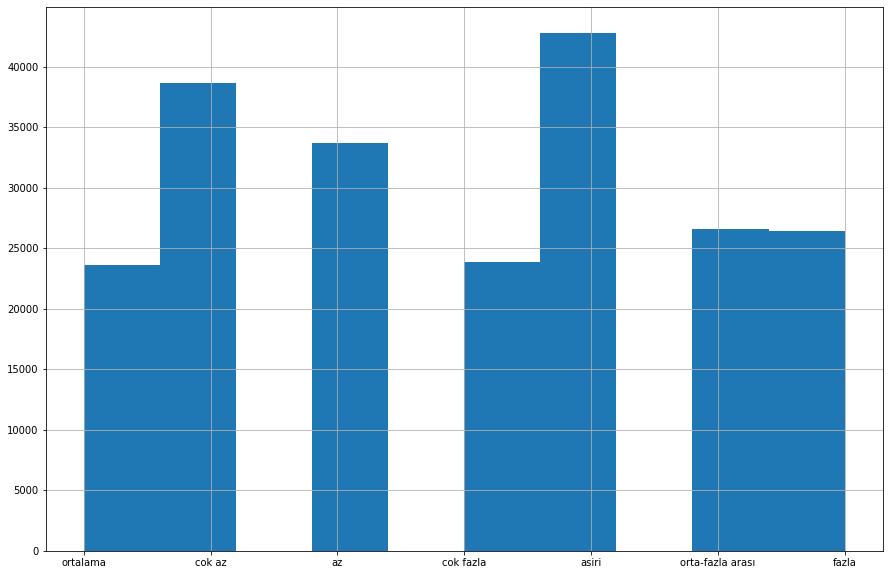

In [231]:
# 'odometer' sütunundan Kategorize edilmiş  kullanılma mesafelerinin grafiği
st_clean['kullanilma mesafesi'].hist(figsize = (15, 10))

In [232]:
# Araçların yıllarına göre modellerinin kullanılma mesafelerine göre ortalama fiyatları

np.round(pd.pivot_table(st_clean,index='year',columns='kullanilma mesafesi',values='price' ,aggfunc='mean').sort_index(ascending=False))/1000

kullanilma mesafesi,asiri,az,cok az,cok fazla,fazla,orta-fazla arası,ortalama
year,,,,,,,
2022.0,4.259,21.000,20.476,4.790,2.000,NaN,NaN
2020.0,2.266,32.542,33.080,2.500,10.036,26.849,28.982
2019.0,8.974,28.503,31.800,22.769,29.817,27.416,28.815
2018.0,28.021,28.815,29.129,22.387,20.170,25.381,26.486
2017.0,27.761,26.235,28.076,23.371,21.083,21.304,23.987
2016.0,24.268,24.046,27.911,18.599,19.122,18.805,21.485
2015.0,22.467,24.048,23.683,19.018,17.539,18.797,20.933
2014.0,15.161,24.097,26.658,15.001,15.290,17.219,22.373
2013.0,13.188,23.787,21.709,13.362,13.245,16.614,19.209


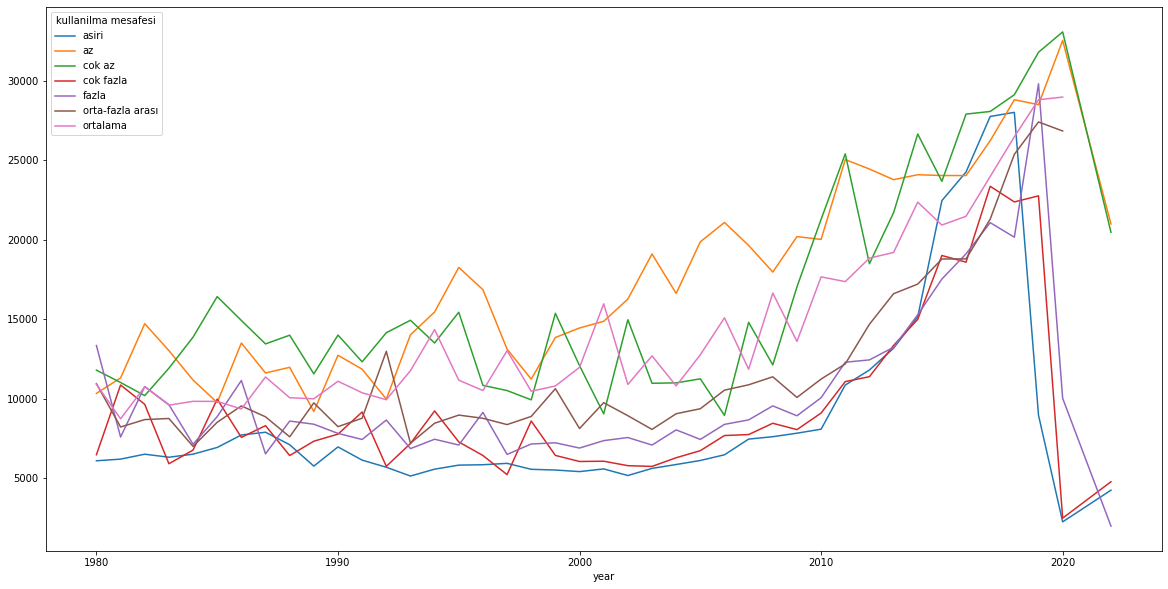

In [233]:
# Yukardaki tablonun grafiği
np.round(pd.pivot_table(st_clean,index='year',columns='kullanilma mesafesi',values='price' ,aggfunc='mean').sort_index(ascending=False)).plot(figsize = (20, 10))

In [234]:
st_clean['price_k']=np.round(st_clean['price']/1000)
st_clean['price_k'] = st_clean['price_k'].astype('int') 
st_clean.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,age,tarih,month,yearr,kullanilma mesafesi,price_k
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al,32.590,-85.4800,2021-05-04T12:31:18-0500,7.0,2021-05-04,05,2021,ortalama,34
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al,32.590,-85.4800,2021-05-04T12:31:08-0500,11.0,2021-05-04,05,2021,ortalama,23
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T12:31:25-0500,1.0,2021-05-04,05,2021,cok az,40
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T10:41:31-0500,4.0,2021-05-04,05,2021,az,31
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.592,-85.5189,2021-05-03T14:02:03-0500,8.0,2021-05-03,05,2021,cok fazla,15


#KM BAŞINA MARKALARIN FİYAT DEĞERİ

In [235]:
#Araç markalarının kullanılmış mil başına ne kadar fiyatlarının olduğunun değerinin hesaplanması ve bir sütunda gösterilmesi

per_km = st_clean
per_km['per_k'] = per_km['odometer'] / per_km['price']
per_km2 = per_km[per_km['year']==2019]

In [236]:
# Stati olarak 'clean' gözüken araçların markalarının mil başına fiyatları

np.round(pd.pivot_table(per_km,index='manufacturer' ,values='per_k' ,aggfunc='mean').sort_index(ascending=False))

,per_k
manufacturer,
volvo,4529.0
volkswagen,170.0
toyota,382.0
tesla,199.0
subaru,385.0
saturn,46.0
rover,359.0
ram,746.0
porsche,287.0


In [237]:
#2019 model araçların mil başına fiyatları

np.round(pd.pivot_table(per_km2,index='manufacturer' ,values='per_k' ,aggfunc='mean').sort_index(ascending=False))

,per_k
manufacturer,
volvo,0.0
volkswagen,3.0
toyota,377.0
tesla,1.0
subaru,1.0
rover,1.0
ram,610.0
nissan,9.0
mitsubishi,366.0


#ARABA TÜRLERİNE GÖRE ADETLERİ

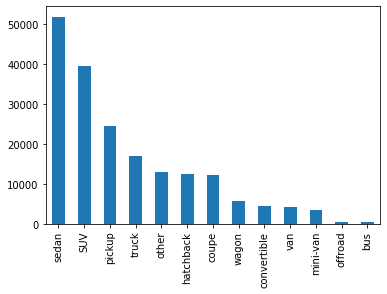

In [238]:
# 'clean' statüsündeki araçların hangi türden olduğunu gösteren grafik
st_clean['type'].value_counts().plot(kind='bar')


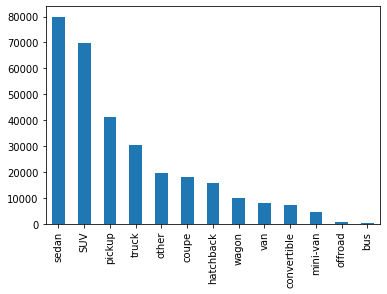

In [239]:
# Bütün verilere bakılarak oluşturulan araç türleri grafiği

df['type'].value_counts().plot(kind='bar')

In [240]:
counter=lambda x: x if x.value_counts() > 100 else None

In [241]:
# 2015'ten yeni arabalar için yeni bir dataframe

st_clean1=st_clean[st_clean['year']>2015]
st_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72797 entries, 29 to 426879
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   72797 non-null  int64  
 1   region               72797 non-null  object 
 2   price                72797 non-null  int64  
 3   year                 72797 non-null  float64
 4   manufacturer         70847 non-null  object 
 5   model                72687 non-null  object 
 6   condition            72797 non-null  object 
 7   cylinders            37024 non-null  object 
 8   fuel                 72795 non-null  object 
 9   odometer             72797 non-null  float64
 10  title_status         72797 non-null  object 
 11  transmission         72795 non-null  object 
 12  drive                48311 non-null  object 
 13  type                 68927 non-null  object 
 14  paint_color          58257 non-null  object 
 15  state                72797 non-nul

In [242]:
# 2015'ten yeni 'good' statüsündeki araçların markalarına ve türlerine göre ortalama fiyatları

np.round(pd.pivot_table(st_clean1,index='type',columns='manufacturer',values='price' ,aggfunc= 'mean').sort_index(ascending=False))/1000

manufacturer,acura,alfa-romeo,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,fiat,ford,gmc,harley-davidson,honda,hyundai,infiniti,jaguar,jeep,kia,land rover,lexus,lincoln,mazda,mercedes-benz,mini,mitsubishi,nissan,porsche,ram,rover,subaru,tesla,toyota,volkswagen,volvo
type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
wagon,26.900,NaN,34.874,29.415,26.110,30.850,15.442,NaN,10.225,11.995,18.338,NaN,NaN,22.730,16.322,21.348,NaN,9.862,17.788,NaN,18.146,34.950,16.332,6.998,14.512,19.000,10.857,38.900,29.480,26.895,22.751,0.001,20.340,20.944,24.843
van,NaN,NaN,NaN,0.384,12.299,NaN,24.043,24.357,21.437,NaN,28.371,29.829,NaN,28.534,8.000,NaN,NaN,25.800,20.558,NaN,NaN,NaN,NaN,32.215,41.060,NaN,22.569,NaN,27.456,NaN,NaN,NaN,29.691,NaN,NaN
truck,NaN,NaN,NaN,NaN,NaN,NaN,33.216,NaN,29.500,NaN,34.400,34.085,NaN,28.450,NaN,NaN,NaN,42.474,NaN,NaN,35.375,NaN,NaN,44.570,NaN,37.345,28.053,NaN,33.077,NaN,0.100,NaN,32.754,NaN,36.206
sedan,25.152,29.829,32.562,31.227,20.415,30.377,14.513,21.445,24.530,12.500,14.959,35.857,11.500,22.485,16.681,28.369,27.358,7.295,18.438,NaN,32.372,28.825,17.648,31.064,20.235,13.112,15.507,46.999,NaN,3.950,24.524,38.684,18.606,20.950,31.863
pickup,NaN,NaN,17.995,NaN,NaN,NaN,32.860,NaN,NaN,NaN,33.556,34.977,NaN,32.641,NaN,NaN,NaN,37.941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.494,NaN,32.617,NaN,NaN,NaN,33.607,NaN,NaN
other,35.625,29.226,33.775,36.941,29.480,36.555,28.347,1.500,24.253,22.527,25.940,33.289,14.306,26.945,25.029,36.134,37.100,31.461,24.435,NaN,36.676,35.764,28.735,33.257,33.858,23.302,21.654,38.849,16.333,36.623,26.106,36.999,32.956,27.461,33.800
offroad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.995,NaN,NaN,NaN,NaN,NaN,NaN,34.131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.885,NaN,NaN,NaN,32.128,NaN,NaN
mini-van,NaN,NaN,NaN,NaN,NaN,NaN,24.296,16.700,16.566,NaN,22.073,17.695,NaN,22.839,NaN,NaN,NaN,NaN,14.761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.744,NaN,30.960,NaN,NaN,NaN,28.134,NaN,NaN
hatchback,32.911,30.300,30.427,27.546,15.759,34.249,17.488,NaN,15.191,18.615,18.072,27.865,NaN,20.597,18.365,27.752,23.990,15.219,14.544,NaN,31.091,28.295,19.025,22.555,24.653,18.883,18.168,47.500,15.500,NaN,23.908,48.000,20.418,20.640,15.120


In [243]:
# Aynı dataframede 5000'den fazla aracı bulunan markalar için yeni bir dataframe oluşturulması

counts = st_clean['manufacturer'].value_counts()
st_clean2=st_clean1.groupby('manufacturer').filter(lambda x : len(x)>5000)
st_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16646 entries, 29 to 426817
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   16646 non-null  int64  
 1   region               16646 non-null  object 
 2   price                16646 non-null  int64  
 3   year                 16646 non-null  float64
 4   manufacturer         16646 non-null  object 
 5   model                16616 non-null  object 
 6   condition            16646 non-null  object 
 7   cylinders            10524 non-null  object 
 8   fuel                 16644 non-null  object 
 9   odometer             16646 non-null  float64
 10  title_status         16646 non-null  object 
 11  transmission         16644 non-null  object 
 12  drive                12075 non-null  object 
 13  type                 15137 non-null  object 
 14  paint_color          13775 non-null  object 
 15  state                16646 non-nul

In [244]:
#5000'den fazla miktarda bulunan markaların araç türlerine fiyatlarını gösteren tablo

np.round(pd.pivot_table(st_clean2,index='type',columns='manufacturer',values='price' ,aggfunc= 'mean').sort_index(ascending=False))/1000

manufacturer,chevrolet,ford
type,,
wagon,15.442,18.338
van,24.043,28.371
truck,33.216,34.400
sedan,14.513,14.959
pickup,32.860,33.556
other,28.347,25.940
offroad,NaN,48.995
mini-van,24.296,22.073
hatchback,17.488,18.072


#MARKA ADET GRAFİĞİ

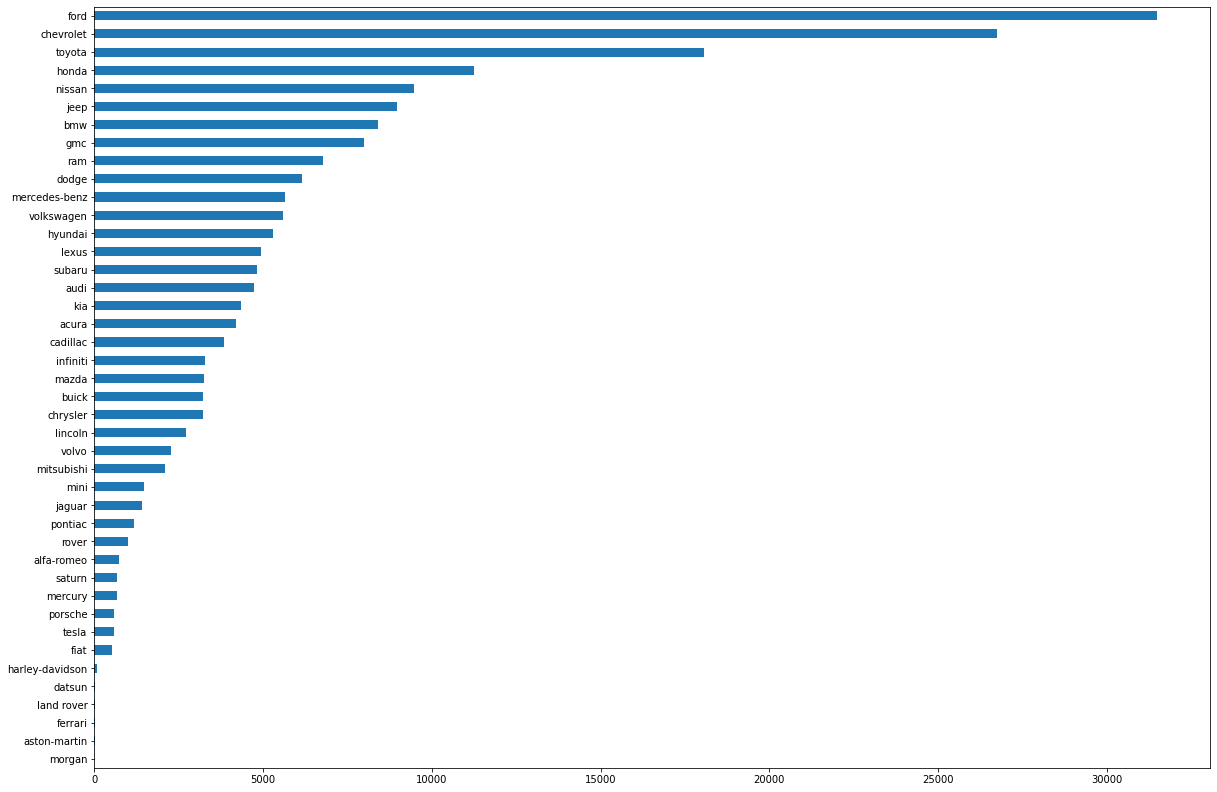

In [245]:
# Hangi markanın ne kadar miktarda aracının olduğunu gösteren grafik

st_clean.manufacturer.value_counts().sort_values().plot(kind = 'barh',figsize = (20, 14))

#MARKALARIN ARABA YAŞINA GÖRE FİYATLARI

In [246]:
mea=lambda x: x.mean() if x.mean() > 40000 else None

In [247]:
# Arabaların yaşları ve markalarına göre ortalama fiyatları
np.round(pd.pivot_table(st_clean,index='age',columns='manufacturer',values='price' ,aggfunc= 'mean').sort_index(ascending=True))

manufacturer,acura,alfa-romeo,aston-martin,audi,bmw,buick,cadillac,chevrolet,chrysler,datsun,dodge,ferrari,fiat,ford,gmc,harley-davidson,honda,hyundai,infiniti,jaguar,jeep,kia,land rover,lexus,lincoln,mazda,mercedes-benz,mercury,mini,mitsubishi,morgan,nissan,pontiac,porsche,ram,rover,saturn,subaru,tesla,toyota,volkswagen,volvo
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6872.0,NaN,NaN,NaN,NaN,NaN,4790.0,NaN,NaN,2500.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2700.0,NaN,NaN,27694.0,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1750.0,NaN,NaN
1.0,38538.0,35481.0,NaN,39947.0,40535.0,32329.0,35760.0,29374.0,29771.0,NaN,34004.0,NaN,27000.0,35061.0,40182.0,27995.0,26910.0,26561.0,35809.0,40771.0,35598.0,22634.0,NaN,36832.0,36504.0,31470.0,38502.0,NaN,25188.0,20598.0,NaN,25997.0,NaN,NaN,39001.0,43578.0,NaN,31075.0,40131.0,31650.0,27275.0,35488.0
2.0,34525.0,32078.0,NaN,37183.0,35991.0,23764.0,33615.0,30810.0,26385.0,NaN,27702.0,NaN,20871.0,32212.0,32608.0,9000.0,26628.0,21481.0,33595.0,39327.0,31099.0,22717.0,NaN,35752.0,34439.0,29112.0,37919.0,NaN,31981.0,18289.0,NaN,25953.0,NaN,NaN,32765.0,36322.0,NaN,26505.0,37942.0,32977.0,26824.0,36246.0
3.0,28357.0,29514.0,NaN,33729.0,34508.0,25057.0,28493.0,27308.0,22718.0,NaN,25710.0,NaN,20421.0,28873.0,31957.0,NaN,23624.0,17928.0,29340.0,33966.0,32360.0,18398.0,NaN,33783.0,27479.0,23516.0,33797.0,NaN,22752.0,21419.0,NaN,20216.0,NaN,46026.0,34777.0,35969.0,NaN,23800.0,40849.0,28236.0,21088.0,33445.0
4.0,27278.0,28279.0,NaN,29968.0,30048.0,23029.0,28797.0,27118.0,20584.0,NaN,23105.0,NaN,19994.0,25587.0,30084.0,16299.0,19935.0,15302.0,27887.0,27321.0,29368.0,16981.0,NaN,29741.0,30575.0,21410.0,35130.0,NaN,23091.0,18527.0,NaN,21886.0,NaN,40762.0,30574.0,27461.0,NaN,19238.0,48000.0,25130.0,18590.0,24513.0
5.0,22829.0,NaN,NaN,27928.0,27046.0,18157.0,24128.0,24823.0,14585.0,NaN,19429.0,NaN,14597.0,23866.0,31905.0,NaN,17850.0,14118.0,23412.0,29915.0,21437.0,13705.0,47995.0,28768.0,23241.0,20538.0,25717.0,NaN,18655.0,23888.0,NaN,17037.0,NaN,37078.0,29371.0,30950.0,NaN,21562.0,26682.0,25759.0,14767.0,24529.0
6.0,21296.0,NaN,NaN,21055.0,22683.0,16132.0,26026.0,23387.0,12522.0,NaN,17232.0,NaN,7660.0,24222.0,28447.0,22800.0,15183.0,14559.0,20992.0,32855.0,19906.0,11755.0,NaN,22490.0,19257.0,12992.0,28132.0,NaN,16970.0,12055.0,NaN,11952.0,NaN,36197.0,28741.0,29955.0,NaN,15596.0,37498.0,20829.0,15543.0,17942.0
7.0,18645.0,NaN,NaN,22236.0,19954.0,13002.0,17037.0,21657.0,12342.0,NaN,13457.0,NaN,9741.0,18580.0,26228.0,12832.0,14098.0,10847.0,17860.0,32537.0,18569.0,10139.0,NaN,24157.0,13652.0,11188.0,22309.0,NaN,13022.0,15879.0,NaN,10447.0,NaN,35595.0,26321.0,28895.0,NaN,13480.0,37475.0,23151.0,12286.0,15743.0
8.0,17037.0,NaN,NaN,19345.0,18044.0,12454.0,19947.0,18663.0,8607.0,NaN,9744.0,NaN,9330.0,16937.0,22757.0,14815.0,12937.0,10055.0,18794.0,19293.0,21553.0,8300.0,NaN,22713.0,15691.0,10137.0,21257.0,NaN,15511.0,7836.0,NaN,9835.0,NaN,31017.0,23007.0,21465.0,NaN,13086.0,32330.0,17817.0,12234.0,13670.0


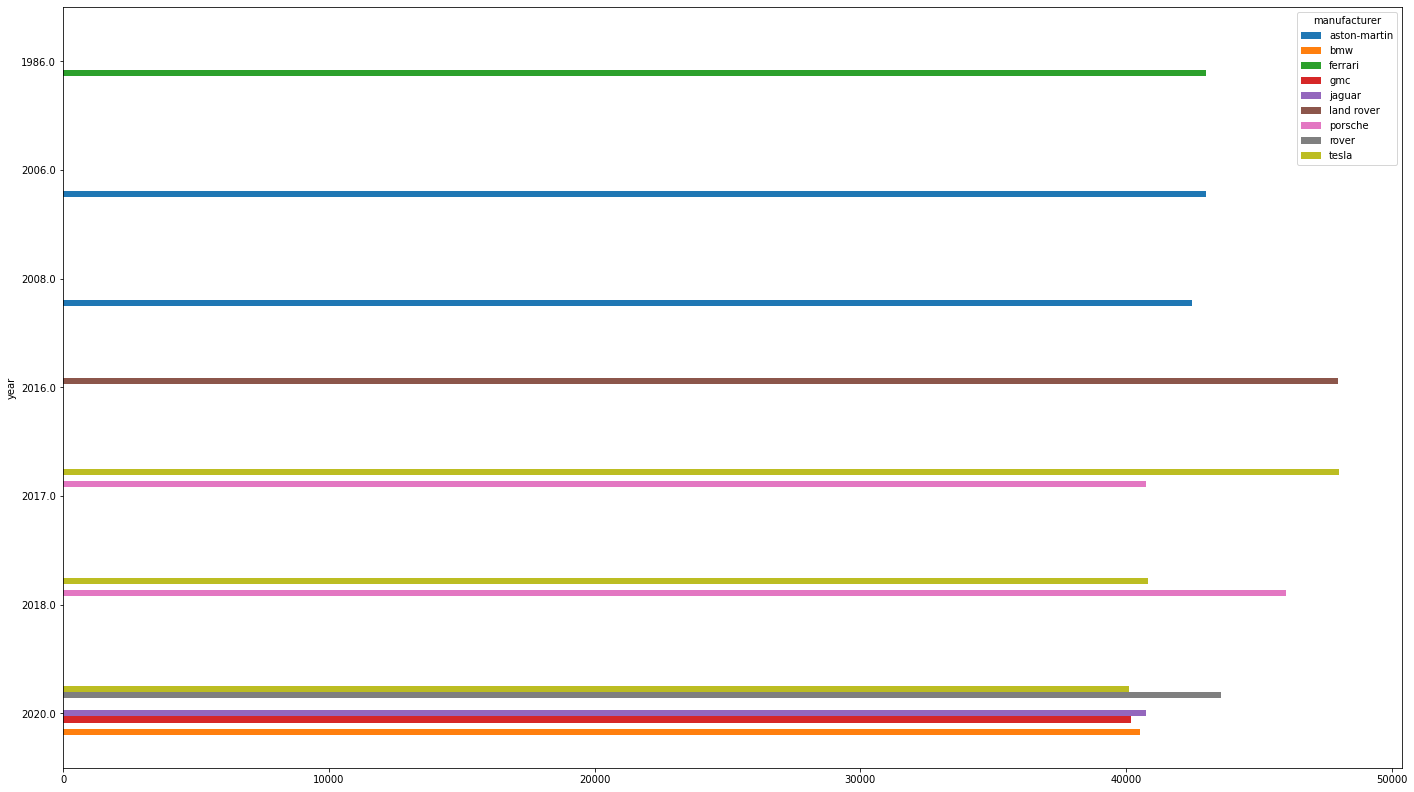

In [248]:
# Ortalama fiyatları 40000'den fazla olan markaların araba yaşlarına göre fiyatlarını gösteren grafik

mea=lambda x: x.mean() if x.mean() > 40000 else None
graph=np.round(pd.pivot_table(st_clean,index='year',columns='manufacturer',values='price' ,aggfunc=mea).sort_index(ascending=False)).plot(figsize = (24, 14),kind='barh')


In [249]:
# Markaların ortalama araç fiyatları
pd.pivot_table(st_clean,index='manufacturer',values='price' ,aggfunc='mean').sort_index(ascending=False)/1000

,price
manufacturer,
volvo,19.124577
volkswagen,14.566227
toyota,16.144395
tesla,36.400956
subaru,13.513363
saturn,5.525690
rover,23.593717
ram,25.122793
porsche,25.117974


In [250]:
# 2020 model araçların markalarına göre ortalama fiyatları

yeni_fiyat = st_clean[st_clean['year']== 2020]
pd.pivot_table(yeni_fiyat,index='manufacturer',values='price' ,aggfunc='mean').sort_index(ascending=False)/1000


,price
manufacturer,
volvo,35.487972
volkswagen,27.275133
toyota,31.649583
tesla,40.130720
subaru,31.074725
rover,43.577793
ram,39.000763
nissan,25.997250
mitsubishi,20.598219


#EYALETLERE GÖRE GRAFİKLER

In [251]:
st_clean.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,age,tarih,month,yearr,kullanilma mesafesi,price_k,per_k
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al,32.590,-85.4800,2021-05-04T12:31:18-0500,7.0,2021-05-04,05,2021,ortalama,34,1.724412
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al,32.590,-85.4800,2021-05-04T12:31:08-0500,11.0,2021-05-04,05,2021,ortalama,23,3.153121
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T12:31:25-0500,1.0,2021-05-04,05,2021,cok az,40,0.483961
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T10:41:31-0500,4.0,2021-05-04,05,2021,az,31,1.327009
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.592,-85.5189,2021-05-03T14:02:03-0500,8.0,2021-05-03,05,2021,cok fazla,15,8.533333


In [252]:
# Araç markalarının eyaletlere göre araç fiyatları

pd.pivot_table(st_clean,index='manufacturer',columns='state',values=['price'] ,aggfunc='mean').sort_index(ascending=False)/1000

price             ...                      
state                   ak         al  ...         wv         wy
manufacturer                           ...                      
volvo            34.699143  25.650436  ...  24.612000  15.895000
volkswagen       17.619793  11.211939  ...  14.981667   4.400000
toyota           22.736000  20.019516  ...  21.097145  20.327500
tesla                  NaN  35.490000  ...  35.490000        NaN
subaru           19.533780  16.754409  ...  12.785818  15.327375
saturn            6.333333   2.639800  ...   3.633333   0.600000
rover            37.245667  20.223333  ...  19.754000  28.500000
ram              26.047340  27.161545  ...  30.769762  21.056235
porsche          36.500000  19.950000  ...  18.500000  20.000000
pontiac           7.580000   4.620000  ...  12.895000        NaN
nissan           19.966846  17.460522  ...  17.896875  14.607500
morgan                 NaN        NaN  ...        NaN        NaN
mitsubishi       14.339800  22.354162  ...  20.555455  21.242500
mini             16.179600  16.520000  ...        NaN        NaN
mercury                NaN   2.000000  ...        NaN        NaN
mercedes-benz    25.733263  19.579902  ...  33.350000  31.857083
mazda            19.546875  18.313909  ...  21.934545  18.642500
lincoln          19.092222  26.786017  ...  26.719071  29.290000
lexus            24.528750  22.456564  ...  26.955000  25.941000
land rover             NaN        NaN  ...        NaN        NaN
kia              17.355187  13.761563  ...  16.364500  16.226500
jeep             23.542882  26.152603  ...  22.577813  20.182500
jaguar           40.745000  28.226800  ...  33.420769  20.593333
infiniti         18.148000  26.717453  ...  29.720000  36.857500
hyundai          13.824059  15.305714  ...  18.305333  14.327833
honda            17.546450  12.050990  ...   8.559000  14.361077
harley-davidson  20.696250        NaN  ...        NaN        NaN
gmc              25.272926  26.839968  ...  22.160136  24.371063
ford             19.244931  23.280379  ...  24.875348  21.758767
fiat             14.567714  11.766667  ...        NaN        NaN
ferrari                NaN        NaN  ...        NaN        NaN
dodge            19.819413  19.107552  ...  24.135125  25.304222
datsun                 NaN        NaN  ...        NaN        NaN
chrysler         15.528167  12.486692  ...  13.696667  16.399400
chevrolet        19.862217  24.319839  ...  28.581337  20.881400
cadillac         28.497500  22.235750  ...  24.776667  26.380000
buick            17.565214  18.038000  ...  18.433545  20.190000
bmw              26.944212  24.006815  ...  29.721489  29.715833
audi             29.255773  27.967673  ...  36.129231  24.177143
aston-martin           NaN        NaN  ...        NaN        NaN
alfa-romeo       33.750000  30.641852  ...  28.132857  32.690000
acura            26.497500  29.348696  ...  29.504286  30.950000

[42 rows x 51 columns]

In [253]:
# Araç markalarının eyaletlere göre kaç yılında yapılmış arabalarının olduğunu gösteren tablo

pd.pivot_table(st_clean,index='manufacturer',columns='state',values='year' ,aggfunc='mean').sort_index(ascending=False)

state,ak,al,ar,az,ca,co,ct,dc,de,fl,ga,hi,ia,id,il,in,ks,ky,la,ma,md,me,mi,mn,mo,ms,mt,nc,nd,ne,nh,nj,nm,nv,ny,oh,ok,or,pa,ri,sc,sd,tn,tx,ut,va,vt,wa,wi,wv,wy
manufacturer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
volvo,2016.000000,2016.205128,2014.555556,2013.156250,2013.706806,2010.897059,2011.500000,2012.000000,2006.111111,2013.014599,2013.865385,2007.250000,2010.888889,2007.666667,2012.488889,2012.533333,2013.526316,2014.877551,2016.880000,2011.764706,2012.030303,2007.100000,2014.614035,2012.400000,2015.818182,2010.000000,2006.000000,2011.750000,2002.000000,2009.000000,2010.225806,2010.666667,2010.090909,2012.375000,2012.682927,2012.724490,2015.000000,2007.259259,2012.279720,2011.590909,2014.837838,2010.600000,2014.533333,2013.901099,2008.000000,2010.714286,2011.435897,2003.035714,2012.964286,2016.400000,2009.500000
volkswagen,2013.586207,2013.030303,2013.428571,2013.816456,2012.454435,2008.752137,2013.020408,2013.574074,2011.521739,2013.751174,2013.287129,2007.647059,2011.092308,2010.951613,2013.404255,2014.525000,2013.232877,2013.333333,2015.720930,2013.863095,2014.422222,2011.895833,2014.811518,2014.069767,2012.937500,2014.000000,2008.875000,2013.693642,2013.400000,2011.083333,2010.830189,2012.600000,2014.716216,2014.186441,2014.076271,2012.636364,2015.222222,2008.893130,2013.076577,2013.528302,2014.061728,2009.666667,2015.055556,2013.976190,2003.285714,2011.427536,2013.962963,2007.228916,2013.874286,2010.916667,1982.000000
toyota,2013.328767,2012.323944,2011.577982,2010.896907,2009.811484,2007.966063,2010.650000,2009.692771,2010.392857,2011.071078,2011.714286,2008.940741,2010.608824,2010.116183,2010.515068,2011.538462,2010.902439,2012.255144,2011.463087,2010.776952,2011.102041,2010.830846,2012.144809,2010.307971,2011.089041,2009.214286,2006.402878,2011.123490,2014.333333,2006.947368,2010.778243,2009.848901,2010.387850,2011.026087,2011.416667,2010.532338,2011.904167,2007.451745,2010.866785,2010.080000,2011.120000,2011.357143,2012.691630,2011.553531,2007.633333,2009.937500,2011.837321,2007.651613,2010.663951,2011.618182,2010.916667
tesla,NaN,2015.500000,2019.000000,2015.789474,2016.862500,2014.666667,2017.400000,2015.333333,2016.666667,2017.032258,2017.000000,2015.000000,2019.000000,2014.000000,2017.000000,2017.000000,2016.400000,2017.333333,2016.000000,2016.809524,2016.700000,NaN,2016.444444,2017.000000,2018.000000,NaN,2018.000000,2016.352941,NaN,NaN,2016.250000,2017.050000,2017.500000,2015.000000,2017.394737,2017.114286,2018.750000,2016.571429,2016.962963,2017.000000,2016.571429,2018.000000,2016.833333,2016.807692,NaN,2016.416667,NaN,2014.166667,2017.533333,2016.000000,NaN
subaru,2013.097561,2013.090909,2012.076923,2013.807692,2012.203642,2010.632653,2010.107843,2013.166667,2010.888889,2014.236453,2013.872727,2011.307692,2011.681818,2011.139394,2012.810811,2012.450000,2013.029412,2012.933333,2015.555556,2012.270408,2012.175000,2011.718310,2012.537190,2012.058824,2011.600000,2016.500000,2010.598039,2012.910828,2018.000000,2011.333333,2011.891566,2010.111111,2011.345455,2015.148148,2011.887133,2012.471429,2013.260870,2010.497835,2011.604000,2012.050000,2012.862745,2011.000000,2014.876543,2014.376068,2012.000000,2010.752688,2013.753425,2008.333333,2011.944828,2011.272727,2012.750000
saturn,2004.666667,2005.000000,NaN,2005.888889,2005.229508,2005.266667,2006.000000,2008.000000,NaN,2005.576271,2006.000000,NaN,2006.692308,2003.714286,2005.294118,2004.538462,2006.538462,2006.571429,2005.000000,2007.500000,2008.000000,2005.750000,2007.320000,2005.960000,2004.333333,2004.000000,2007.500000,2006.153846,NaN,2005.000000,2006.400000,2006.714286,2007.666667,2003.636364,2006.481481,2005.691358,2007.400000,2004.846154,2005.727273,2006.666667,2006.888889,2004.666667,2007.800000,2006.733333,2007.000000,2006.708333,2008.000000,2003.000000,2005.607143,2002.666667,2002.000000
rover,2015.916667,2010.500000,2013.750000,2012.111111,2012.861878,2008.000000,2012.071429,2011.250000,NaN,2013.192771,2012.727273,2012.000000,2013.250000,200

#ARABA RENGİNE GÖRE GRAFİKLER

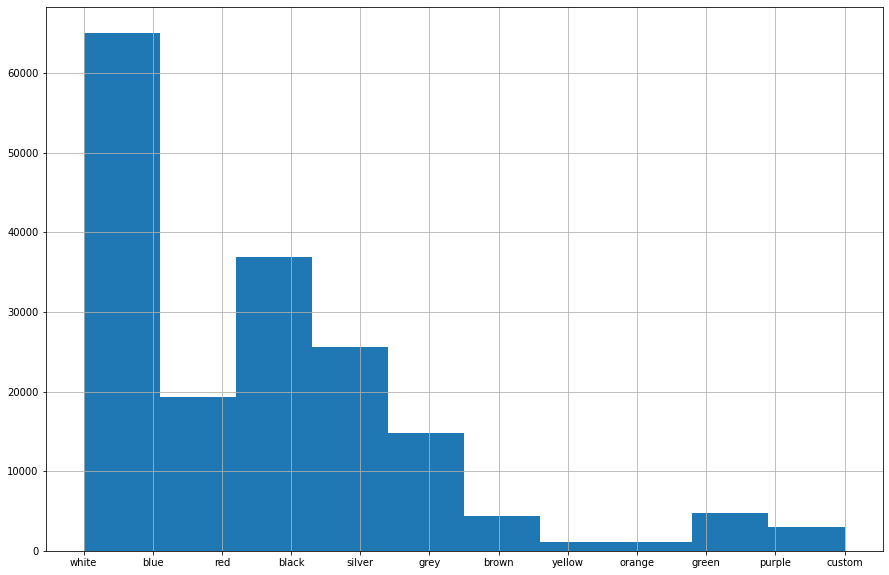

In [254]:
# Renkelere göre araçların dağılımı
st_clean['paint_color'].hist(figsize=(15,10))

In [255]:
# Markaların renklere göre araç fiyatları
pd.pivot_table(st_clean,index='paint_color',columns='manufacturer',values='price' ,aggfunc='mean').sort_index(ascending=False)

manufacturer,acura,alfa-romeo,aston-martin,audi,bmw,buick,cadillac,chevrolet,chrysler,datsun,dodge,ferrari,fiat,ford,gmc,harley-davidson,honda,hyundai,infiniti,jaguar,jeep,kia,land rover,lexus,lincoln,mazda,mercedes-benz,mercury,mini,mitsubishi,morgan,nissan,pontiac,porsche,ram,rover,saturn,subaru,tesla,toyota,volkswagen,volvo
paint_color,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
yellow,9050.000000,NaN,NaN,23193.888889,16926.363636,6625.000000,8319.500000,25872.279070,7625.000000,NaN,25166.564103,NaN,9238.000000,14428.009950,11014.531250,NaN,9085.000000,10717.750000,32923.333333,3995.000000,19599.297297,7753.857143,NaN,14711.000000,7319.000000,8666.666667,7570.785714,3488.500000,6210.736842,4000.000000,NaN,7196.583333,14164.687500,17032.181818,17587.230769,NaN,7128.500000,4242.142857,40000.000000,10372.276923,8263.615385,42650.000000
white,27581.025343,29522.676259,NaN,27366.567010,23522.050037,17232.944193,23776.426724,19768.852225,10613.534831,20900.000000,16300.952616,NaN,15564.228571,20399.842037,22748.216000,NaN,14624.673425,15729.470772,21127.069588,26903.351220,20384.578989,12647.301980,7995.000000,22418.800403,19145.300175,15875.983834,21277.193849,4755.408602,12991.317919,19321.643326,1800.0,17191.137540,6408.767606,29955.230769,26458.543339,25098.905941,4495.732394,16640.343109,36301.190217,18544.030215,15067.688574,19849.768571
silver,22831.612382,32334.782609,42995.0,23182.696880,16862.408393,13619.168975,19459.735632,16260.545883,10348.773077,16200.000000,12016.419250,1.0,9989.083333,14544.465496,20803.715017,13656.166667,11343.419474,10435.614907,17809.919162,26240.264706,19805.541473,12277.990083,8500.000000,22106.336842,16734.419492,9379.888514,15856.790109,4117.947368,14393.680851,14054.476923,NaN,13007.993931,5141.039548,22145.039474,22671.260181,18502.926471,4263.617284,11924.180375,39760.217391,15955.278662,12501.448951,14061.602787
red,25937.963731,29281.025641,NaN,28010.772414,24460.371711,22059.880000,19605.087273,22685.444762,7872.955224,17900.000000,14290.150362,39000.0,14076.611111,16077.517663,20750.138258,14500.000000,12262.750322,12593.871179,21064.045455,24005.816667,17717.540733,14830.618182,10000.000000,23236.557756,18440.752688,17660.730022,20541.677083,3790.790323,13448.989529,13661.850427,NaN,13859.120813,6448.010582,18082.868421,22307.731707,23883.090909,10180.214286,13691.469512,38181.142857,20011.654378,18396.676211,24437.688406
purple,6450.000000,NaN,NaN,8122.500000,8582.333333,7690.615385,13949.444444,9599.565217,2050.000000,NaN,26367.765957,NaN,NaN,7291.185185,10565.500000,NaN,7116.281250,4042.857143,13725.000000,NaN,19239.210526,11208.944444,NaN,26995.000000,4800.000000,5462.500000,20217.375000,8500.000000,6026.666667,6098.333333,NaN,9369.136364,2566.666667,11500.000000,12576.888889,NaN,1950.000000,7699.166667,NaN,5559.380952,9337.500000,NaN
orange,1000.000000,5900.000000,NaN,13747.500000,21268.333333,6500.000000,37590.000000,21175.686957,3999.000000,2500.000000,20961.408696,NaN,7631.666667,22858.314159,10645.000000,19900.000000,9080.852941,13326.310345,7000.000000,NaN,18515.778689,12462.000000,NaN,16400.000000,1500.000000,9608.333333,NaN,NaN,12614.222222,18509.772727,NaN,16568.150000,11707.000000,NaN,14957.240000,13449.000000,4511.153846,13006.800000,NaN,23329.000000,14650.368421,21474.000000
grey,11189.754098,27540.000000,NaN,14079.324484,14286.989305,9012.522388,11704.050360,12180.861319,9366.449799,5500.000000,10799.814672,NaN,9231.785714,13961.706236,16201.482100,18325.000000,9460.687808,8795.153247,11872.442708,12289.172414,15670.416974,9979.409241,5148.333333,14559.921147,11373.156250,8429.936455,14995.506623,4962.194444,8483.780000,7605.945652,NaN,10047.511563,5082.072917,21580.888889,20994.743590,18969.872727,4894.205128,11108.272109,37295.000000,13465.405343,9050.397229,9338.899225
green,5007.473684,37990.000000,NaN,33220.285714,6411.064516,6029.250000,6451.653846,11336.217778,4146.478261,NaN,27455.731707,NaN,7087.700000,10641.536885,10400.252874,NaN,6717.596226,5115.390244,1

In [263]:
model=st_clean[st_clean['manufacturer']=='ford']

In [267]:
model['model'].value_counts()

f-150                      2722
escape                      975
mustang                     898
explorer                    886
focus                       750
                           ... 
f-150 fx4 4x4                 1
f150 extended 4dr             1
f250 super duty ext-cab       1
escape hev                    1
f-750 crew cab                1
Name: model, Length: 1959, dtype: int64

In [269]:
model_f150=model[model['model']=='f-150']

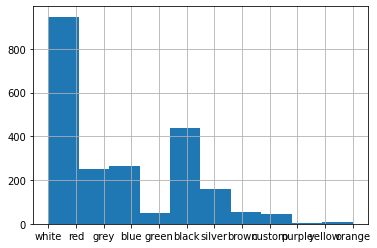

In [270]:
model_f150['paint_color'].hist()

In [271]:
pd.pivot_table(model_f150,index='paint_color',values='price',aggfunc='mean').sort_index(ascending=False)/1000

,price
paint_color,
yellow,12.944000
white,17.601967
silver,20.146193
red,14.452273
purple,4.840000
orange,26.122500
grey,21.706434
green,9.835021
custom,21.192717


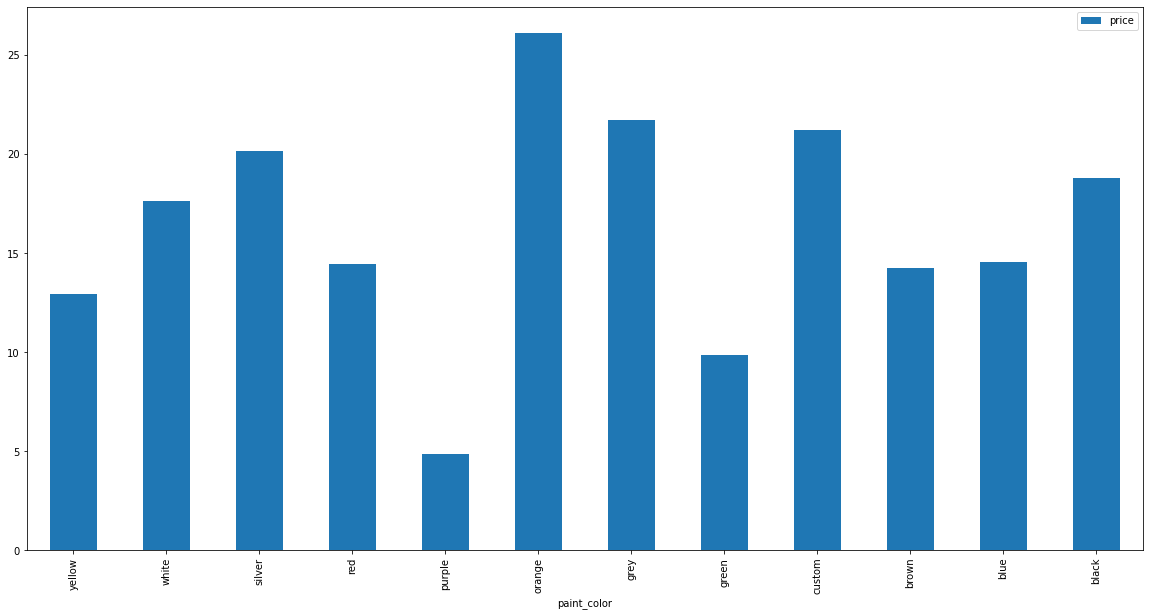

In [276]:
(pd.pivot_table(model_f150,index='paint_color',values='price',aggfunc='mean').sort_index(ascending=False)/1000).plot(kind='bar',figsize=(20,10))

In [285]:
model_f150_2019=model[model['year']==2013]

In [288]:
pd.pivot_table(model_f150_2019,index='paint_color',values='price',aggfunc='mean').sort_index(ascending=False)/1000

,price
paint_color,
yellow,18.777143
white,18.629292
silver,15.925842
red,15.693876
purple,9.442857
orange,13.137857
grey,13.586801
green,12.771012
custom,14.307132


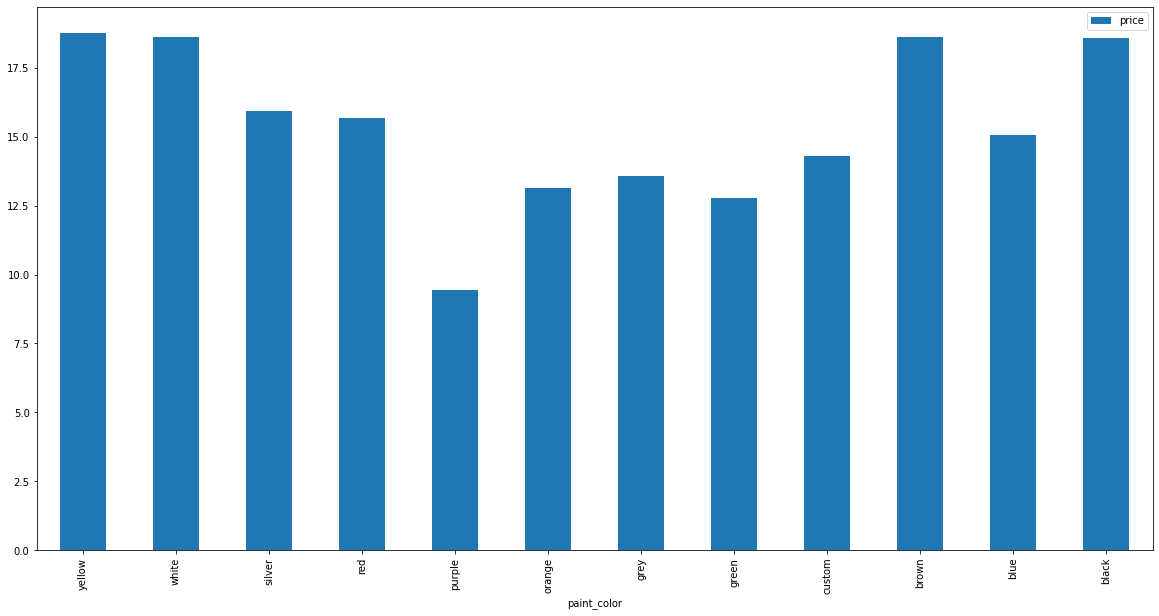

In [287]:
(pd.pivot_table(model_f150_2019,index='paint_color',values='price',aggfunc='mean').sort_index(ascending=False)/1000).plot(kind='bar',figsize=(20,10))

In [256]:
# Renklere göre ortalama araç fiyatları
pd.pivot_table(st_clean,index='paint_color',values='price' ,aggfunc='mean').sort_index(ascending=False)/1000

,price
paint_color,
yellow,17.408399
white,20.164575
silver,15.494701
red,18.389299
purple,11.286265
orange,18.670629
grey,12.217586
green,12.001138
custom,11.556704


In [257]:
st_clean.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,age,tarih,month,yearr,kullanilma mesafesi,price_k,per_k
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,2.0,2021-04-04,04,2021,az,24,1.366087
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,1.0,2021-04-04,04,2021,cok az,31,0.393233
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,1.0,2021-04-04,04,2021,cok az,35,0.119291
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,3.0,2021-04-04,04,2021,az,29,1.038703
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,rwd,coupe,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600,2.0,2021-04-04,04,2021,cok az,31,0.742596


# MARKA-YAKIT TÜRÜ-YILINA GÖRE FİYAT LİSTESİ

In [258]:
st_clean3 = st_clean[['manufacturer','fuel','year','price']]
st_clean3.set_index(['manufacturer','fuel','year'],inplace=True)


In [259]:
# Araçların marka, yakıt türü, üretilme yılına göre fiyat listesi
st_clean3.sort_values(by=['manufacturer'], ascending=True)

price
manufacturer fuel  year         
acura        gas   2019.0  32990
                   2012.0  15590
                   2012.0  18990
                   2013.0  17590
                   2008.0   6500
...                          ...
NaN          gas   2013.0   8990
                   2012.0  12590
                   2018.0  27590
                   2017.0  25590
             other 2016.0  13990

[215826 rows x 1 columns]

In [260]:
st_clean3 = st_clean2[['manufacturer','fuel','year','price']]
st_clean3.dropna(subset=['manufacturer'])

,manufacturer,fuel,year,price
29,chevrolet,gas,2020.0,39590
33,chevrolet,gas,2016.0,34590
35,chevrolet,gas,2016.0,29990
39,chevrolet,gas,2017.0,24590
40,chevrolet,other,2016.0,30990
...,...,...,...,...
426793,chevrolet,gas,2018.0,15999
426796,chevrolet,gas,2017.0,16990
426800,chevrolet,gas,2020.0,41990
426801,chevrolet,other,2017.0,14990


In [261]:
from tabulate import tabulate
#st_clean3.set_index(['manufacturer','fuel','year'],inplace=True)
print(tabulate(st_clean3, headers='firstrow'))


    29  chevrolet    gas         2020.0    39590
------  -----------  --------  --------  -------
    33  chevrolet    gas           2016    34590
    35  chevrolet    gas           2016    29990
    39  chevrolet    gas           2017    24590
    40  chevrolet    other         2016    30990
    42  chevrolet    gas           2016    37990
    44  ford         other         2019    30990
    47  ford         gas           2018    34590
    50  ford         gas           2020    38990
    53  ford         gas           2020    27990
    57  ford         gas           2016    26990
    63  ford         gas           2018    34990
    64  chevrolet    gas           2017    27990
    66  chevrolet    other         2019    32990
    69  chevrolet    gas           2016    23990
    76  ford         gas           2017    29590
    81  ford         gas           2019    37590
   105  ford         other         2019    40590
   188  chevrolet    gas           2020    39590
   205  chevrolet   

#boxplot

In [290]:
st_clean

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,age,tarih,month,yearr,kullanilma mesafesi,price_k,per_k
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al,32.590000,-85.480000,2021-05-04T12:31:18-0500,7.0,2021-05-04,05,2021,ortalama,34,1.724412
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al,32.590000,-85.480000,2021-05-04T12:31:08-0500,11.0,2021-05-04,05,2021,ortalama,23,3.153121
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al,32.590000,-85.480000,2021-05-04T12:31:25-0500,1.0,2021-05-04,05,2021,cok az,40,0.483961
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al,32.590000,-85.480000,2021-05-04T10:41:31-0500,4.0,2021-05-04,05,2021,az,31,1.327009
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.592000,-85.518900,2021-05-03T14:02:03-0500,8.0,2021-05-03,05,2021,cok fazla,15,8.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,2.0,2021-04-04,04,2021,az,24,1.366087
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,1.0,2021-04-04,04,2021,cok az,31,0.393233
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,1.0,2021-04-04,04,2021,cok az,35,0.119291
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,3.0,2021-04-04,04,2021,az,29,1.038703


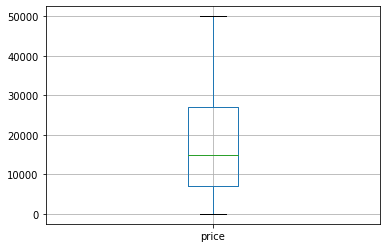

In [289]:
st_clean.boxplot(column='price')

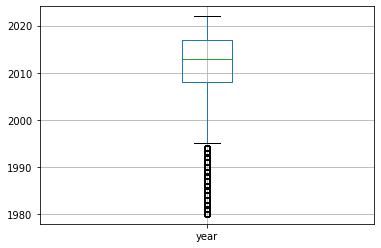

In [291]:
st_clean.boxplot(column='year')

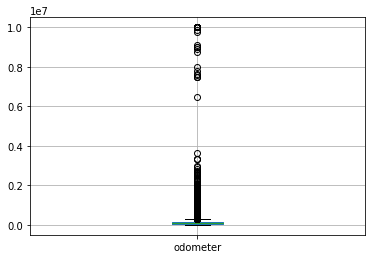

In [292]:
st_clean.boxplot(column='odometer')